In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import sklearn.cross_validation
import sklearn.model_selection
#import statsmodels.api as sm
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [2]:
! pip install --user sklearn

  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print(boston.data.shape)

(506, 13)


In [7]:

bos['PRICE'] = boston.target

In [8]:
# Correlate Nitrous Oxide emission with Property Age
X = bos['NOX']
Y = bos['AGE']

In [9]:
#get instance of clustering class
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=3)

In [10]:
#prepare the data vectors
data = np.concatenate((X.values.reshape(-1,1),Y.values.reshape(-1,1)), axis=1)

#run clustering
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
#view labels
kmeans.labels_

array([2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 2,

In [12]:
#get resultant labels
classes = kmeans.predict(data)


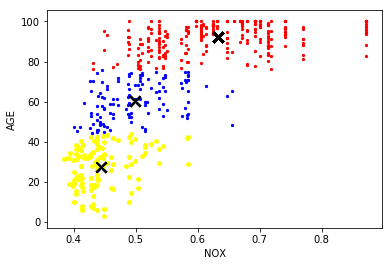

In [13]:
for i in X.keys():
    if classes[i] == 0:
            plt.scatter(X[i],Y[i], marker='o', c='red', edgecolor='red', s=5)
            plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1], c='black', marker='x',s=100)
    elif classes[i] == 1:
            plt.scatter(X[i],Y[i], marker='o', c='yellow', edgecolor='yellow', s=15)
            plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1], c='black', marker='x', s=100)
    elif classes[i] == 2:
            plt.scatter(X[i],Y[i], marker='o', c='blue', edgecolor='blue', s=5)
            plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1], c='black', marker='x', s=100)
plt.xlabel('NOX')
plt.ylabel('AGE')